In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.impute import SimpleImputer
si = SimpleImputer()
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings ('ignore')

In [32]:
df = pd.read_csv('C:/Users/Gayatri/Downloads/smoke_detection_iot.csv')

In [33]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [34]:
df.value_counts()

Unnamed: 0  UTC         Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT    Fire Alarm
0           1654733331  20.000          57.36        0          400        12306   18520        939.735        0.00   0.00   0.00   0.000  0.000  0      0             1
41743       1654778092  26.650          48.97        1140       406        12888   19446        938.747        1.73   1.80   11.93  1.860  0.042  16749  1             1
41745       1654778094  26.720          48.60        1130       400        12897   19446        938.765        1.83   1.90   12.59  1.964  0.044  16751  1             1
41746       1654778095  26.770          48.45        1124       400        12896   19450        938.768        1.86   1.93   12.82  1.999  0.045  16752  1             1
41747       1654778096  26.800          48.33        1115       400        12893   19444        938.761        1.88   1.95   12.93  2.016  0.046  16753  1      

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [36]:
df.drop(['Unnamed: 0', 'UTC'], axis=1, inplace=True) # Duplicate index

<Figure size 1440x1296 with 0 Axes>

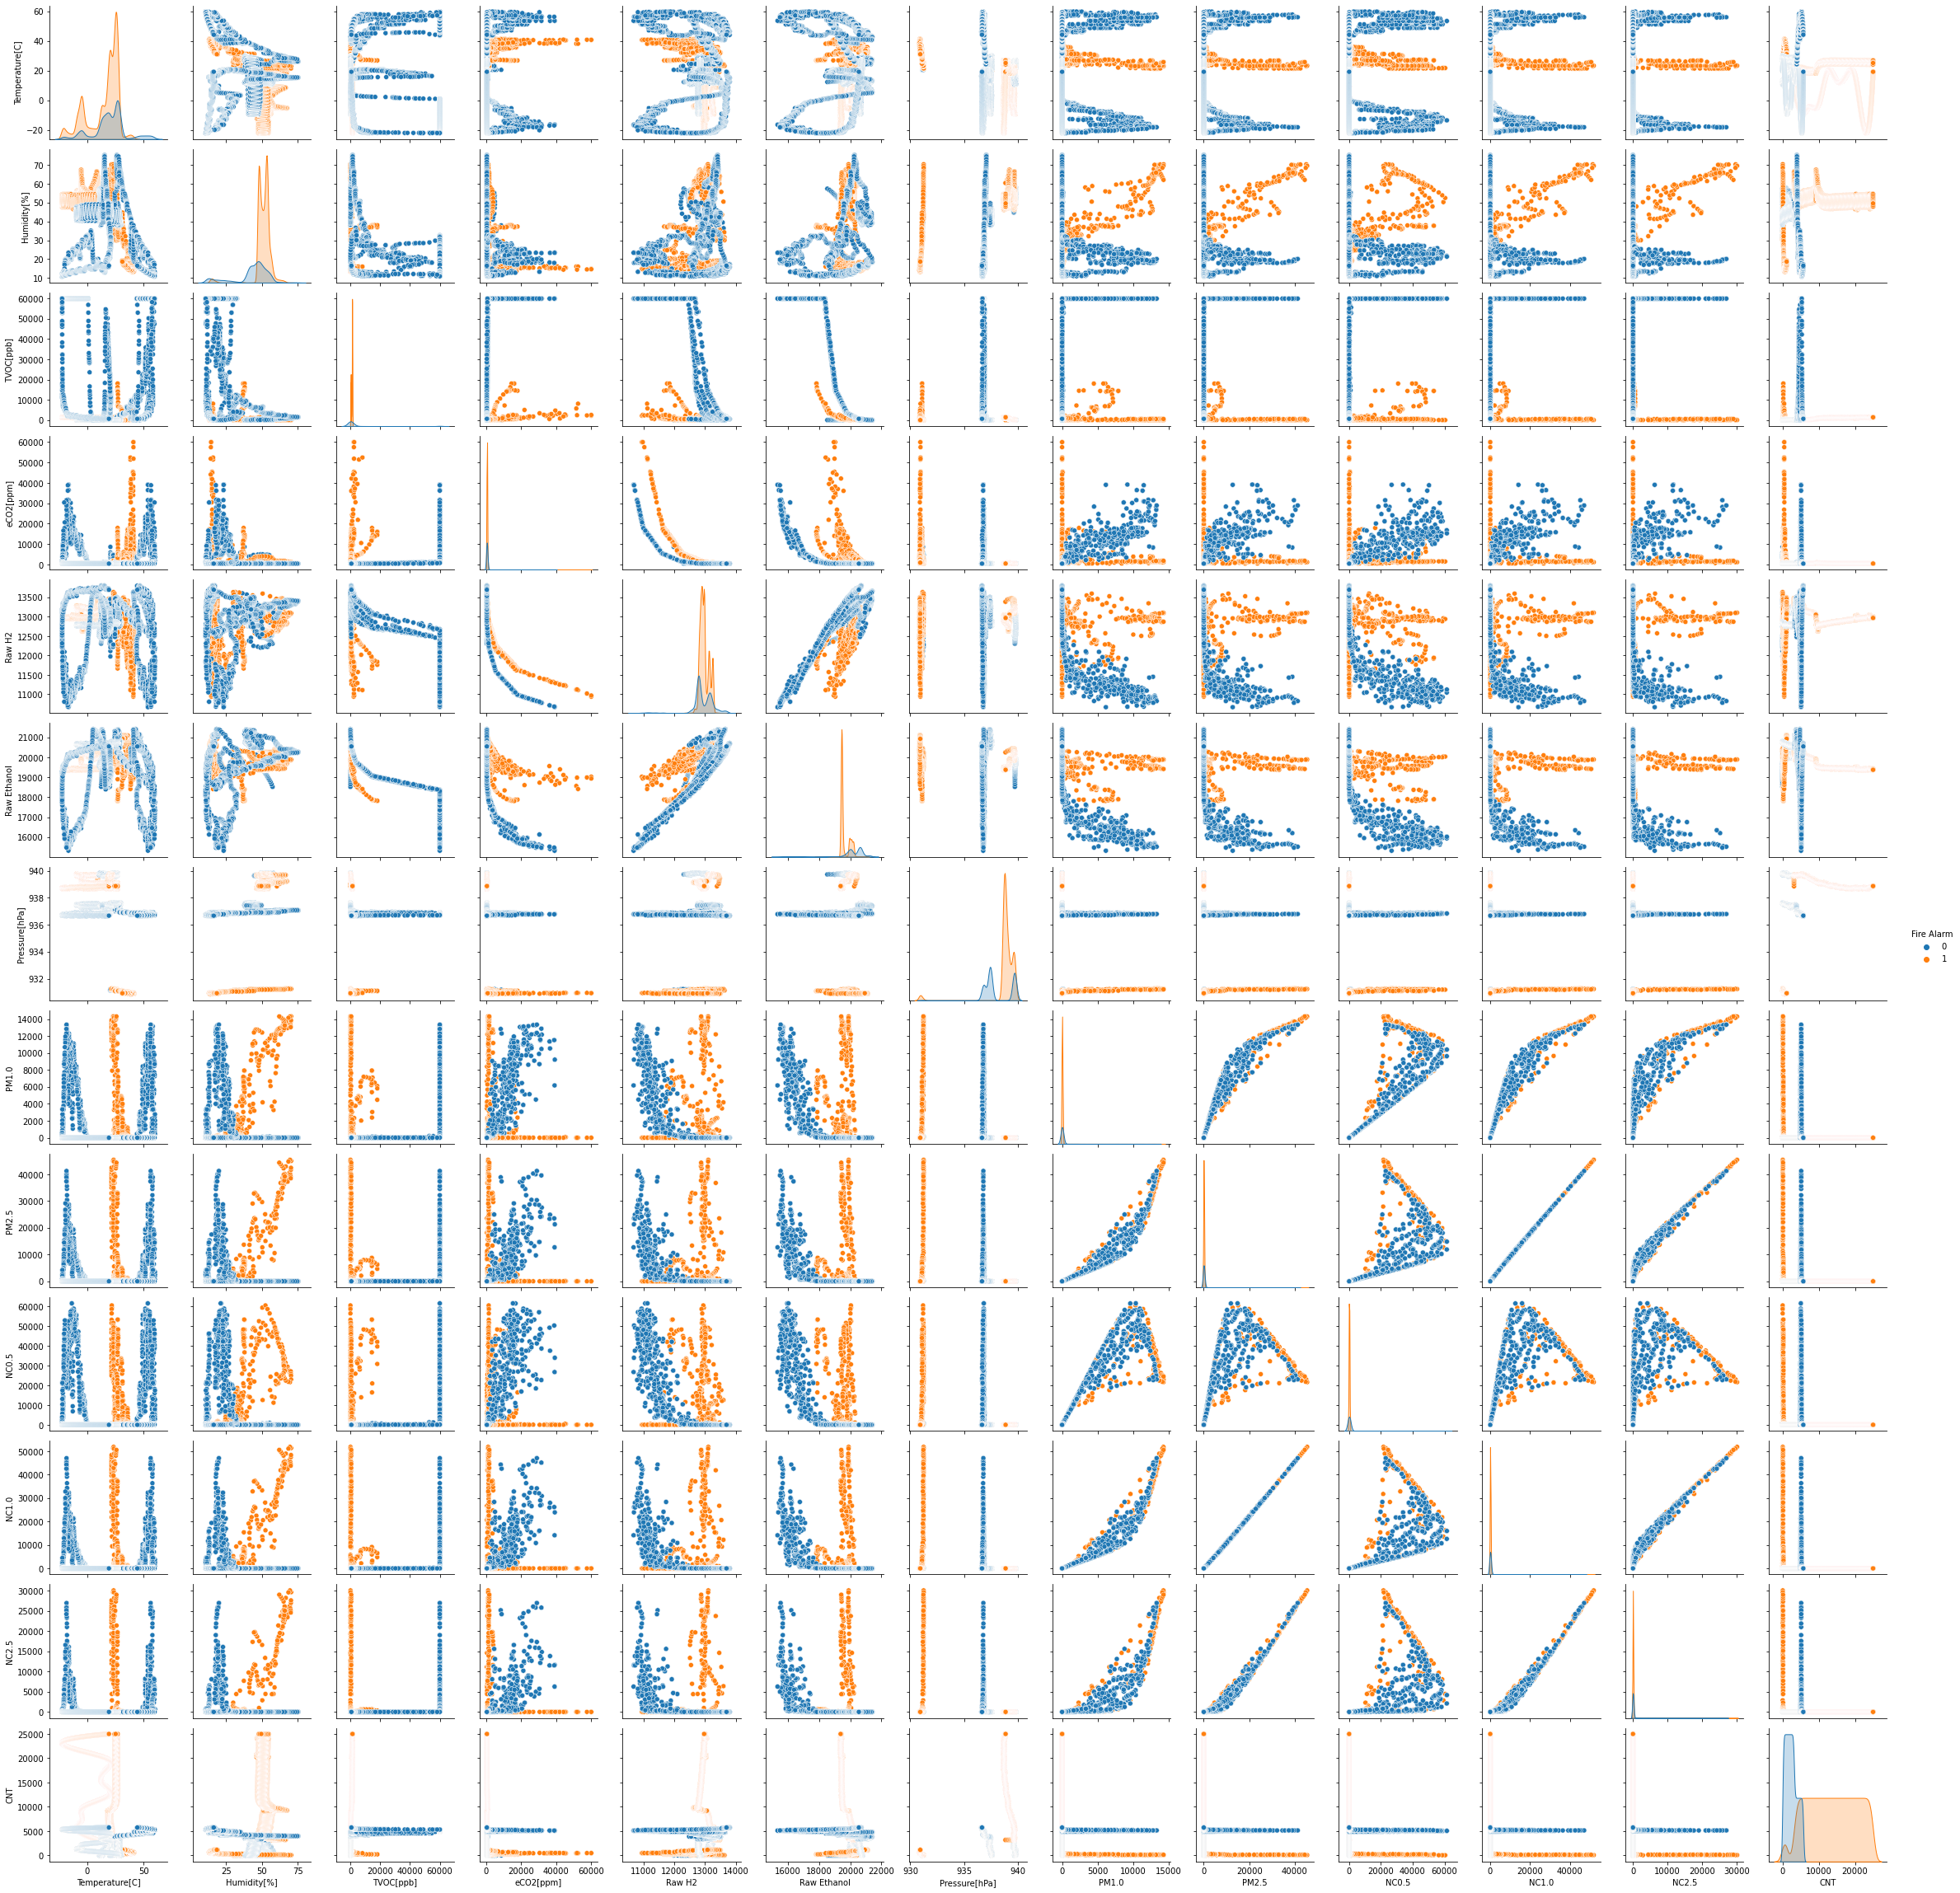

<Figure size 1440x1296 with 0 Axes>

In [38]:
sns.pairplot(df, hue='Fire Alarm')
plt.figure(figsize=(20,18))


<AxesSubplot:>

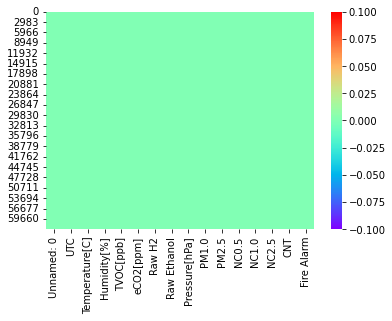

In [4]:
sns.heatmap(df.isnull(), cmap = 'rainbow')

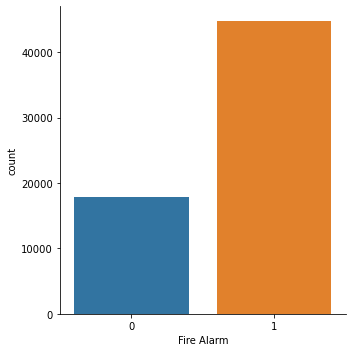

In [6]:
sns.catplot(
    data=df,
    x='Fire Alarm',
    kind='count'
)
plt.show()

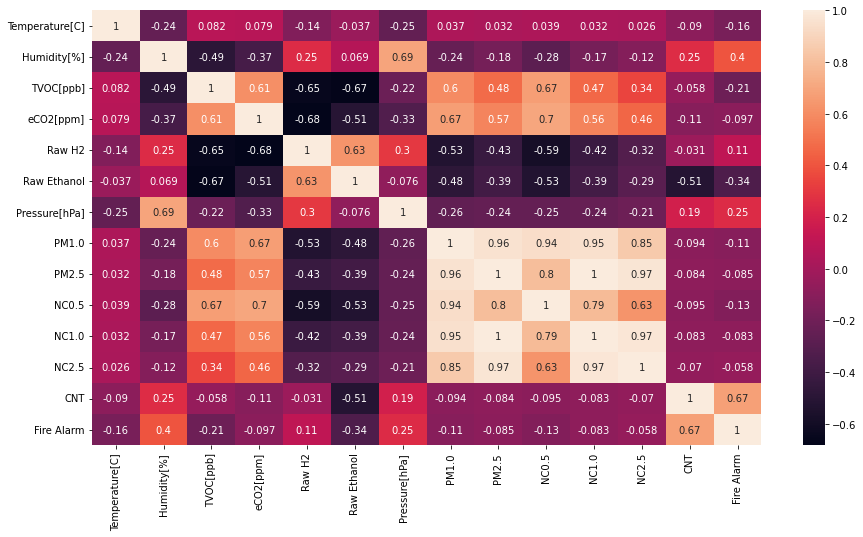

In [7]:
# Calculate
corr = df.corr()

# Visualize
plt.figure(figsize=(15,8))
sns.heatmap(
    data=corr,
    annot=True,
)
plt.show()

**Lower pressure the values are generally belonging to the Class 1 and on higher pressure and higher humidity. The classes are also belonging to Class 1. That's the remaining areas of Class 0.**

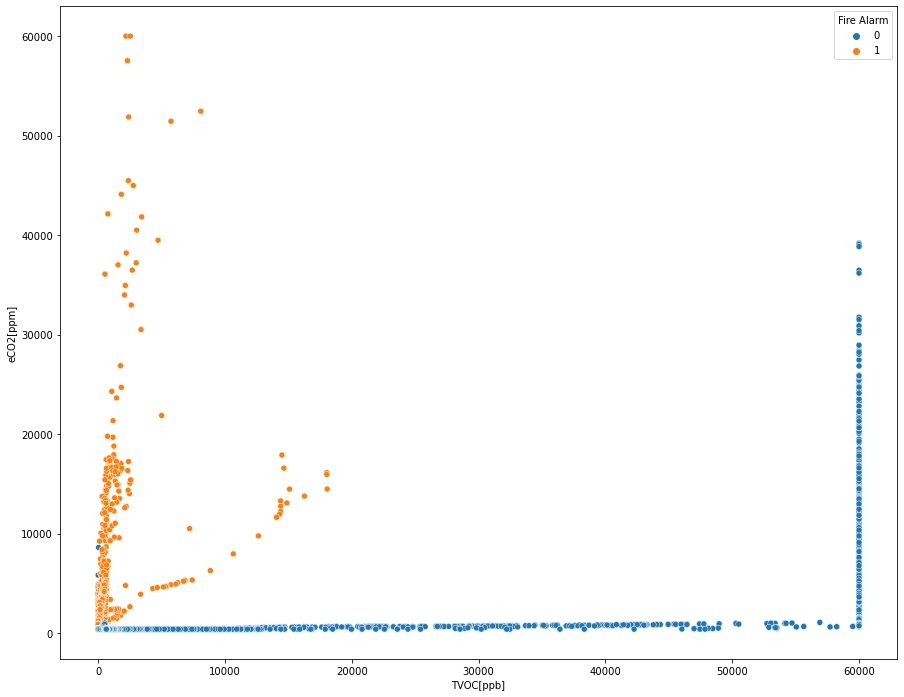

In [9]:
plt.figure(figsize=(15,12))
sns.scatterplot(
    data=df,
    y='eCO2[ppm]',
    x='TVOC[ppb]',
    hue="Fire Alarm"
)
plt.show()

**When TVOC values are close to zero The data belongs to Class 1. As the TVOC values increases. The class changes to 0.**

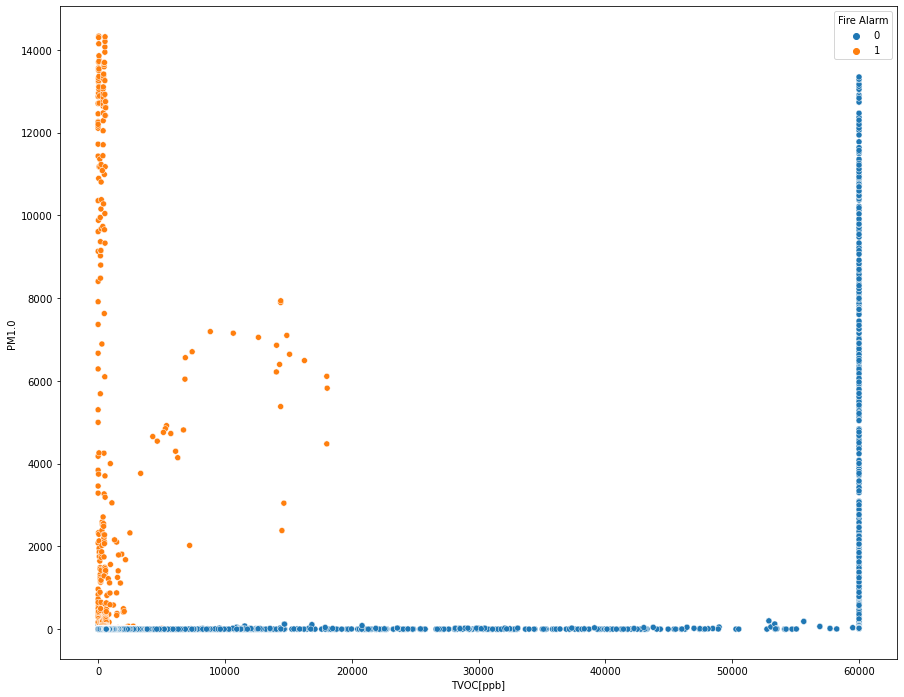

In [10]:
plt.figure(figsize=(15,12))
sns.scatterplot(
    data=df,
    y='PM1.0',
    x='TVOC[ppb]',
    hue="Fire Alarm"
)
plt.show()

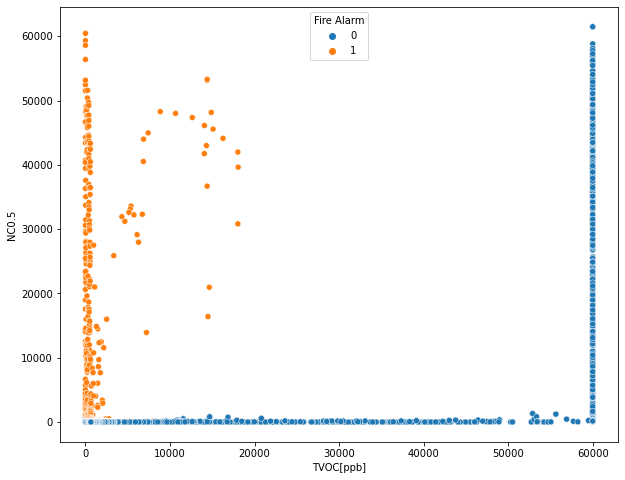

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df,
    y='NC0.5',
    x='TVOC[ppb]',
    hue="Fire Alarm"
)
plt.show()

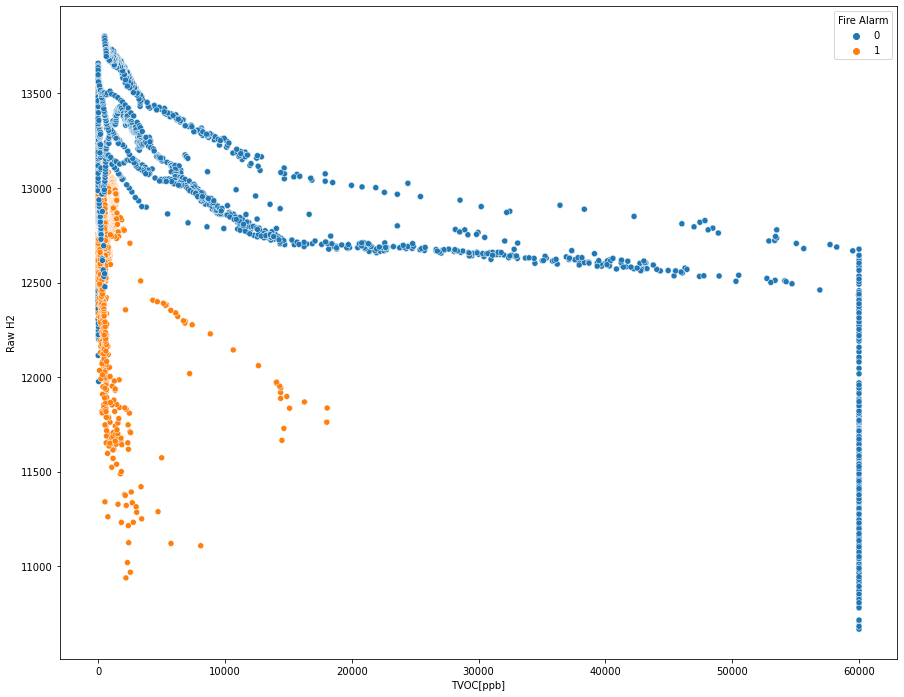

In [12]:
plt.figure(figsize=(15,12))
sns.scatterplot(
    data=df,
    y='Raw H2',
    x='TVOC[ppb]',
    hue="Fire Alarm"
)
plt.show()

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

In [18]:
def mymodel(model):             # this is shortcut function to check each and every algorithm on model
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"training accuracy is {train}\nTesting accuracy is:{test}")
    print (classification_report(ytest,ypred))
    print (confusion_matrix(ytest,ypred))
           

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
lg = mymodel(LogisticRegression())

training accuracy is 0.9907392623343446
Testing accuracy is:0.9898877002501464
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5453
           1       0.99      0.99      0.99     13336

    accuracy                           0.99     18789
   macro avg       0.99      0.99      0.99     18789
weighted avg       0.99      0.99      0.99     18789

[[ 5350   103]
 [   87 13249]]


In [21]:
svc = mymodel(SVC())

training accuracy is 0.9997262836157934
Testing accuracy is:0.9995209963276385
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5446     7]
 [    2 13334]]


In [22]:
kn = mymodel(KNeighborsClassifier())

training accuracy is 0.9997947127118451
Testing accuracy is:0.9995742189579009
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5447     6]
 [    2 13334]]


In [23]:
ab = mymodel(AdaBoostClassifier())

training accuracy is 1.0
Testing accuracy is:0.9998935547394753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5452     1]
 [    1 13335]]


In [24]:
gb = mymodel(GradientBoostingClassifier())

training accuracy is 1.0
Testing accuracy is:0.9999467773697376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5452     1]
 [    0 13336]]


In [25]:
xg = mymodel(XGBClassifier())

training accuracy is 1.0
Testing accuracy is:0.9999467773697376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5452     1]
 [    0 13336]]


In [26]:
rf = mymodel(RandomForestClassifier())

training accuracy is 1.0
Testing accuracy is:0.9999467773697376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

[[ 5452     1]
 [    0 13336]]
